<a href="https://colab.research.google.com/github/jmacedo91/Exploratory-Data-Analysis/blob/main/02_Data_Analysis_Water_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=blue size=10><center>💧 Water Quality - Data Analysis 💧</center></font>
***

# <font color=blue>1. Knowing the data.</font>
***

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

## <font color=blue>Importing the Libraries</font>
***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style="whitegrid")

from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15, 7.5))


## <font color=blue>Importing the Dataset</font>
***

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/01 - Portfólio - Análise de Dados/Datasets/water_potability.csv').round(2)

In [4]:
dataset.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0
1,3.72,129.42,18630.06,6.64,NaN,592.89,15.18,56.33,4.50,0
2,8.10,224.24,19909.54,9.28,NaN,418.61,16.87,66.42,3.06,0
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0
5,5.58,188.31,28748.69,7.54,326.68,280.47,8.40,54.92,2.56,0
6,10.22,248.07,28749.72,7.51,393.66,283.65,13.79,84.60,2.67,0
7,8.64,203.36,13672.09,4.56,303.31,474.61,12.36,62.80,4.40,0
8,NaN,118.99,14285.58,7.80,268.65,389.38,12.71,53.93,3.60,0
9,11.18,227.23,25484.51,9.08,404.04,563.89,17.93,71.98,4.37,0


In [5]:
correlation = dataset.corr()

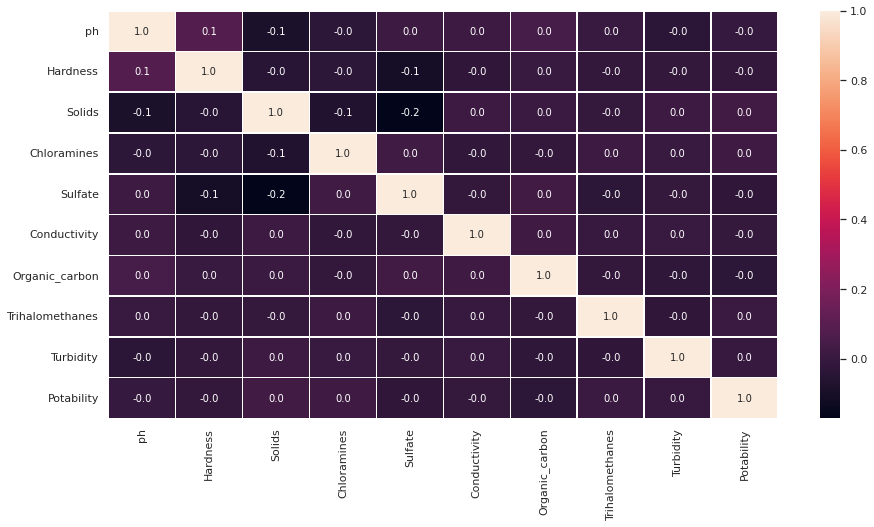

In [6]:
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

<font size= 5>In a preliminary analysis of the data, we noticed that none of the parameters are correlated. This fact does not match the reality of the laboratory. Many of these parameters are directly related to each other and this lack of correlation raises the hypothesis that the data were generated randomly.</font>

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
data_types = pd.DataFrame(dataset.dtypes, columns = ['Data Types'])
data_types.columns.name = 'Parameters'

In [9]:
data_types

Parameters,Data Types
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

# <font color=blue>2. Statistical Analysis of Data.</font>
***

## <font color=blue>2.1. pH Values</font>
***

**pH value:**

PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52 – 6.83 which are in the range of WHO standards.

### <font color=blue>2.1.1. Clearing Null Values</font>
***

In [10]:
dataset_ph = dataset.dropna(subset = ['ph'])

In [11]:
dataset_ph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2785 entries, 1 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         2785 non-null   float64
 2   Solids           2785 non-null   float64
 3   Chloramines      2785 non-null   float64
 4   Sulfate          2116 non-null   float64
 5   Conductivity     2785 non-null   float64
 6   Organic_carbon   2785 non-null   float64
 7   Trihalomethanes  2649 non-null   float64
 8   Turbidity        2785 non-null   float64
 9   Potability       2785 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 239.3 KB


In [12]:
print(f'{dataset.shape[0] - dataset_ph.shape[0]} null values ​​were eliminated')

491 null values ​​were eliminated


### <font color=blue>2.1.2. Descriptive Statistical Analysis</font>
***

In [13]:
descriptive_statistics = pd.DataFrame(dataset_ph['ph'].describe().round(2))


In [14]:
descriptive_statistics

,ph
count,2785.00
mean,7.08
std,1.59
min,0.00
25%,6.09
50%,7.04
75%,8.06
max,14.00


### <font color=blue>2.1.3. Frequency Distribution</font>
***

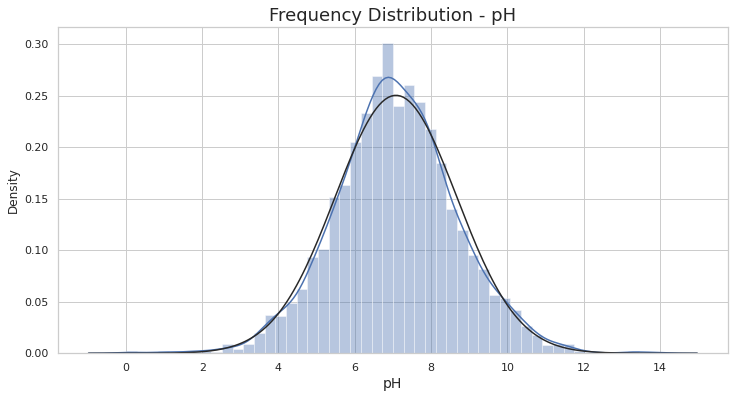

In [15]:
ax = sns.distplot(dataset_ph['ph'], kde = True, fit = norm)
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution - pH', fontsize = 18)
ax.set_xlabel('pH', fontsize = 14)
ax

<font size = 5>We can see that the distribution of pH values ​​presents symmetry in relation to the mean. This is a normal distribution.</font>

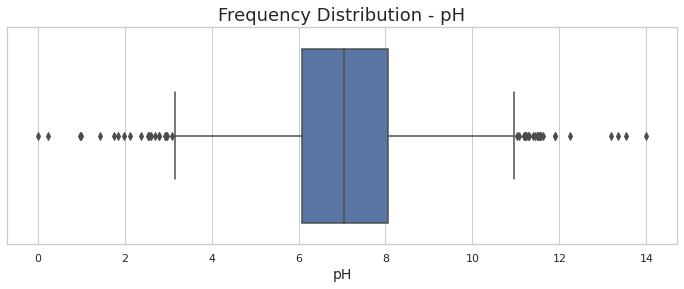

In [16]:
ax = sns.boxplot(x = dataset_ph['ph'], data = dataset_ph, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Frequency Distribution - pH', fontsize = 18)
ax.set_xlabel('pH', fontsize = 14)
ax

<font size = 5>Assuming the WHO acceptable pH range is between 6.5 and 8.5, let's calculate the probability of finding a sample within that range.</font>

In [17]:
lower_Z_ph = (6.5 - dataset_ph['ph'].mean()) / dataset_ph['ph'].std()
lower_Z_ph

-0.3642846607521609

In [18]:
sup_Z_ph = (8.5 - dataset_ph['ph'].mean()) / dataset_ph['ph'].std()
sup_Z_ph

0.8901297960090572

In [19]:
probability = round((norm.cdf(sup_Z_ph) - norm.cdf(lower_Z_ph)), 3)
probability

0.455

In [20]:
print(f'The probability of a sample having the pH value within WHO specifications is {probability * 100}%')

The probability of a sample having the pH value within WHO specifications is 45.5%


In [21]:
round((dataset_ph.query('ph >= 6.5 & ph <= 8.5').shape[0] / dataset_ph.shape[0]), 5)

0.47792

<font size = 5>We noticed that about 50% of the samples present pH values ​​outside the WHO specifications. It is a very considerable amount of samples, that is, we can say that half of the samples have reprehensible values.</font>

### <font color=blue>2.1.4. Sampling Statistical Analysis</font>
***

<font size = 5>In this section we will sample 500 records and evaluate the mean within the 95% confidence interval.</font>

In [22]:
sample_ph = dataset_ph.sample(n = 500, random_state = 100)

In [23]:
sample_ph.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3181,6.64,191.92,10220.71,6.68,380.36,421.42,12.24,65.18,3.15,1
2559,5.87,186.18,18909.85,8.49,328.75,427.18,13.30,52.16,3.73,0
3257,6.68,272.11,18989.32,5.34,336.56,307.73,20.18,75.40,5.21,1
514,5.61,152.95,19835.98,9.35,323.39,596.08,14.38,49.43,4.64,0
2580,5.95,190.55,12767.66,8.94,323.74,499.94,12.42,54.10,4.90,0


In [24]:
sample_ph.ph.describe() # Sample with 500 values

count    500.000000
mean       7.054280
std        1.567157
min        2.130000
25%        6.007500
50%        6.980000
75%        8.045000
max       12.250000
Name: ph, dtype: float64

In [25]:
dataset_ph.ph.describe()

count    2785.000000
mean        7.080804
std         1.594369
min         0.000000
25%         6.090000
50%         7.040000
75%         8.060000
max        14.000000
Name: ph, dtype: float64

####Confidence Interval with 0.05 of significance

In [26]:
standard_deviation_ph = sample_ph['ph'].std()


#### Calculating $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [27]:
sigma = standard_deviation_ph / np.sqrt(500)
sigma

0.07008538853836187

#### Getting $Z$ (0.95 confidence)


In [28]:
z = round(norm.ppf(0.975), 2)
z

1.96

#### Getting $e$

In [29]:
e = z * sigma
e

0.13736736153518925

In [30]:
interval = (
    sample_ph.ph.mean() - e,
    sample_ph.ph.mean() + e
)

interval

(6.916912638464812, 7.191647361535191)

In [31]:
norm.interval(alpha = 0.95,
              loc = sample_ph.ph.mean(),
              scale = sigma
              )

(6.916915162622316, 7.1916448373776864)

In [32]:
sample_ph.query('ph >= 6.9169 & ph <= 7.1916').head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1958,7.15,198.15,32680.98,8.97,283.11,531.60,19.81,81.93,4.63,1
3191,6.99,133.43,21944.64,8.58,341.24,536.28,16.18,91.71,4.25,1
12,7.12,156.70,18730.81,3.61,282.34,347.72,15.93,79.50,3.45,0
2220,7.10,243.41,23493.12,4.79,283.34,341.44,16.07,45.63,3.07,0
1617,6.96,214.38,15007.42,7.00,328.82,468.56,17.41,104.21,4.89,1
232,6.98,183.24,23114.45,6.50,323.16,470.08,16.08,66.00,4.77,0
449,7.08,232.58,26177.79,3.91,334.16,380.46,9.63,41.95,3.70,0
571,7.14,180.90,9727.65,5.71,NaN,399.95,15.95,67.70,3.27,0
1384,6.98,181.12,17503.31,6.93,NaN,181.48,11.60,72.03,4.43,0
507,7.12,204.16,20574.36,7.09,NaN,353.93,16.49,57.02,3.77,0


In [33]:
confidence_interval_samples = sample_ph.query('ph >= 6.9169 & ph <= 7.1916')

In [34]:
confidence_interval_samples.ph.describe()

count    40.000000
mean      7.037000
std       0.077135
min       6.930000
25%       6.980000
50%       7.025000
75%       7.105000
max       7.170000
Name: ph, dtype: float64

In [35]:
dataset_ph.ph.describe()

count    2785.000000
mean        7.080804
std         1.594369
min         0.000000
25%         6.090000
50%         7.040000
75%         8.060000
max        14.000000
Name: ph, dtype: float64

## <font color=blue>2.2. Hardness</font>
***

**Hardness:**

Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

### <font color=blue>2.2.1. Clearing Null Values</font>
***

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


The hardness parameter does not have null values ​​in its register.

### <font color=blue>2.2.2. Descriptive Statistical Analysis</font>
***

In [37]:
descriptive_statistics = pd.DataFrame(dataset['Hardness'].describe().round(2))

In [38]:
descriptive_statistics

,Hardness
count,3276.00
mean,196.37
std,32.88
min,47.43
25%,176.85
50%,196.96
75%,216.67
max,323.12


### <font color=blue>2.2.3. Frequency distribution for quantitative variables (custom classes)</font>
***

<font size = 5>Water containing calcium carbonate at
concentrations below 60 mg/l is generally considered as soft; 60–120 mg/l,
moderately hard; 120–180 mg/l, hard; and more than 180 mg/l, very hard (McGowan,
2000).

How does our data split within these classes?</font>

<b>Soft</b> ► < 60 (mg/L)

<b>Moderately Hard</b> ► 60 <= Hardness < 120 (mg/L)

<b>Hard</b> ► 120 <= Hardness < 180 (mg/L)

<b>Very Hard</b> ► <= 180 (mg/L)

In [39]:
classes = [0, 60, 120, 180, 350]

In [40]:
labels = ['Soft', 'Moderately Hard', 'Hard', 'Very Hard']

In [41]:
frequency = pd.value_counts(
    pd.cut(x = dataset.Hardness,
       bins = classes,
       labels = labels,
       include_lowest = True)
)

frequency

Very Hard          2341
Hard                883
Moderately Hard      51
Soft                  1
Name: Hardness, dtype: int64

In [42]:
percentage = pd.value_counts(
    pd.cut(x = dataset.Hardness,
       bins = classes,
       labels = labels,
       include_lowest = True),
       normalize =True
) * 100

percentage

Very Hard          71.459096
Hard               26.953602
Moderately Hard     1.556777
Soft                0.030525
Name: Hardness, dtype: float64

In [43]:
quatitative_frequency_distribution = pd.DataFrame({'Frequency': frequency, 'Percentage (%)': percentage})
quatitative_frequency_distribution.rename_axis('Classification', axis = 'columns', inplace = True)
quatitative_frequency_distribution

Classification,Frequency,Percentage (%)
Very Hard,2341,71.459096
Hard,883,26.953602
Moderately Hard,51,1.556777
Soft,1,0.030525


Text(0, 0.5, 'Frequency')

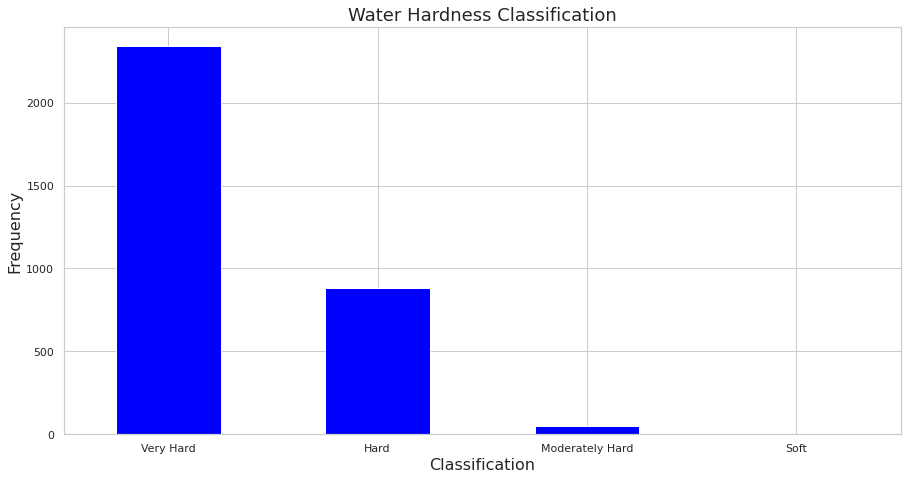

In [44]:
fig = quatitative_frequency_distribution['Frequency'].plot.bar(x = quatitative_frequency_distribution.index, color = 'blue', rot = 0)
fig.set_title('Water Hardness Classification', fontsize = 18)
fig.set_xlabel('Classification', fontsize = 16)
fig.set_ylabel('Frequency', fontsize = 16)

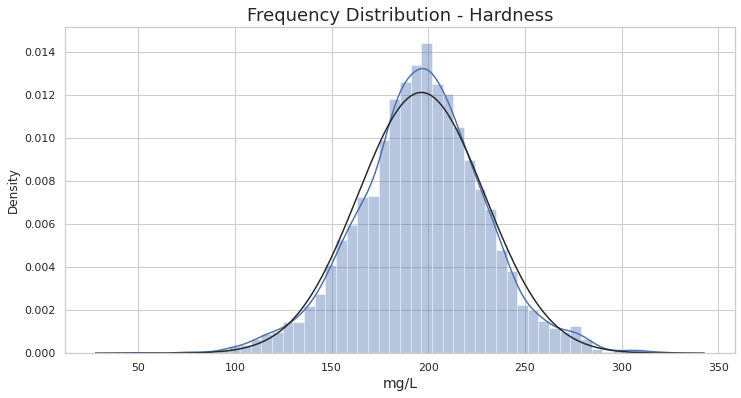

In [45]:
ax = sns.distplot(dataset['Hardness'], kde = True, fit = norm)
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution - Hardness', fontsize = 18)
ax.set_xlabel('mg/L', fontsize = 14)
ax

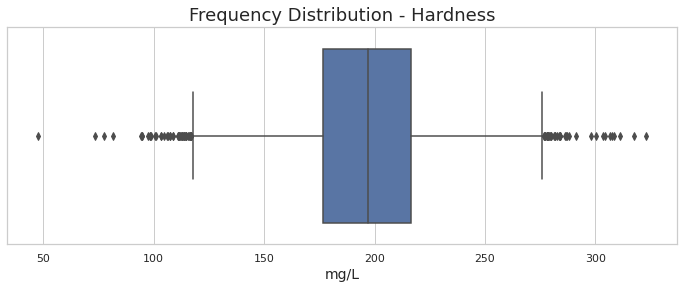

In [46]:
ax = sns.boxplot(x = dataset['Hardness'], data = dataset_ph, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Frequency Distribution - Hardness', fontsize = 18)
ax.set_xlabel('mg/L', fontsize = 14)
ax

The taste threshold for the calcium ion is in the range 100–300 mg/l, depending on the
associated anion, but higher concentrations are acceptable to consumers. 

What is the probability of finding a water with a hardness value within this range?

In [47]:
lower_Z_hd = (100 - dataset['Hardness'].mean()) / dataset['Hardness'].std()
lower_Z_hd

-2.930973770786379

In [48]:
higher_Z_hd = (300 - dataset['Hardness'].mean()) / dataset['Hardness'].std()
higher_Z_hd

3.1518104013544286

In [49]:
probability = round((norm.cdf(higher_Z_hd) - norm.cdf(lower_Z_hd)), 3)
probability

0.997

In [50]:
print(f'The probability of a sample having the Hardness value between 100 and 300 mg/L is {probability * 100}%')

The probability of a sample having the Hardness value between 100 and 300 mg/L is 99.7%


<font size = 5>Analyzing the relationship between hardness and pH, we can see that the values ​​do not correlate. Reinforcing the hypothesis that the data were generated randomly.</font>

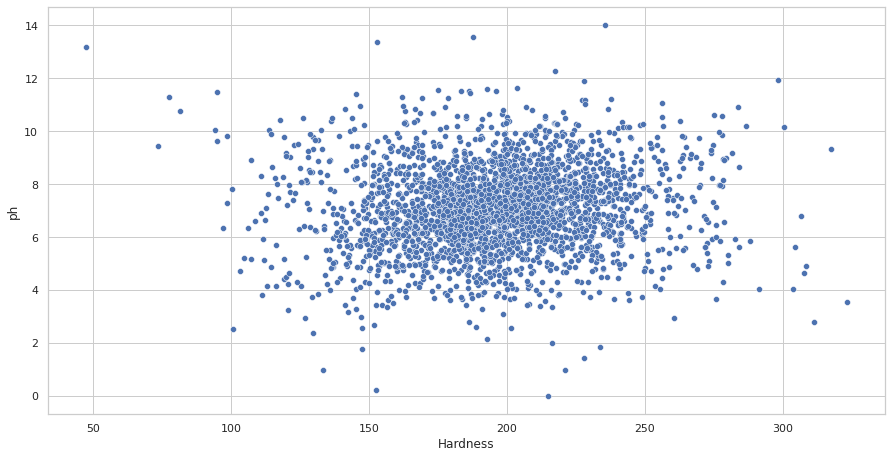

In [51]:
sns.scatterplot(data = dataset_ph, x = 'Hardness',y = 'ph', palette = 'viridis')

## <font color=blue>2.3. Solids</font>
***

### <font color=blue>2.3.1. Clearing Null Values</font>
***

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


The Solids parameter does not have null values ​​in its register.

### <font color=blue>2.3.2. Descriptive Statistical Analysis</font>
***

In [53]:
descriptive_statistics = pd.DataFrame(dataset['Solids'].describe().round(2))

In [54]:
descriptive_statistics

,Solids
count,3276.00
mean,22014.09
std,8768.57
min,320.94
25%,15666.69
50%,20927.83
75%,27332.76
max,61227.20


### <font color=blue>2.3.3. Descriptive Statistical Analysis</font>
***

In [55]:
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0
1,3.72,129.42,18630.06,6.64,NaN,592.89,15.18,56.33,4.50,0
2,8.10,224.24,19909.54,9.28,NaN,418.61,16.87,66.42,3.06,0
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0


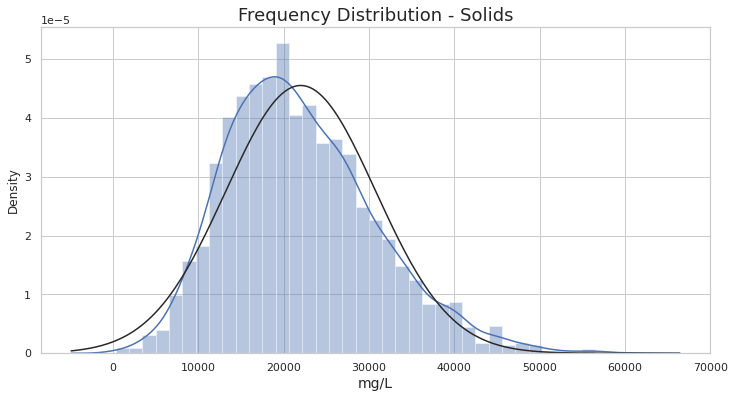

In [56]:
ax = sns.distplot(dataset['Solids'], kde = True, fit = norm)
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution - Solids', fontsize = 18)
ax.set_xlabel('mg/L', fontsize = 14)
ax

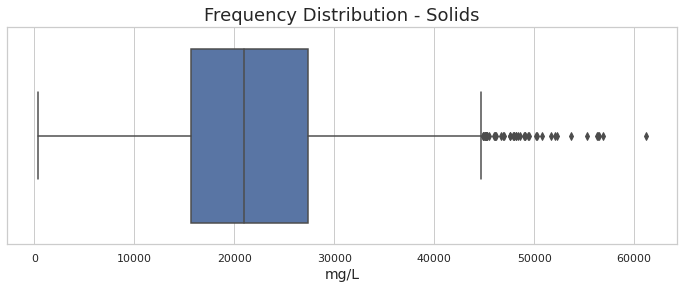

In [57]:
ax = sns.boxplot(x = dataset['Solids'], data = dataset, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Frequency Distribution - Solids', fontsize = 18)
ax.set_xlabel('mg/L', fontsize = 14)
ax